In [12]:
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
#https://www.thepythoncode.com/article/extracting-and-submitting-web-page-forms-in-python
# # Seaborn visualization library
# import seaborn as sns
# # Create the default pairplot
# sns.pairplot(df)

# Pre-processing code from template - START
Project3Git/04 Pre-processing Template/01 Pre-processing- X-Y split - Y One-Hot Encoding - Train-Test Split - Scaling X Training Data.ipynb

In [14]:
#Import encoded data
dataset = pd.read_csv('../03 Feature Engineering/bankchurnersencoded.csv')
dataset.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,1,3,3,1,4,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,0,5,5,2,2,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,1,3,5,1,5,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,0,4,3,3,2,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,1,3,2,1,4,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,1,2,5,1,3,1,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,1,4,1,1,6,3,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,1,0,3,3,4,2,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,1,3,2,2,4,1,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,1,2,5,2,5,1,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


# test begins

In [15]:
##Train Test Split

In [16]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 1].values

In [17]:
X = dataset.drop(["CLIENTNUM", "Attrition_Flag"], axis=1)
print(X.shape)

(10127, 19)


In [18]:
y = dataset["Attrition_Flag"]
print(y.shape)

(10127,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

# Predicting

In [28]:
y_pred = classifier.predict(X_test)

# Evaluating

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 174  154]
 [  31 1667]]
                   precision    recall  f1-score   support

Attrited Customer       0.85      0.53      0.65       328
Existing Customer       0.92      0.98      0.95      1698

         accuracy                           0.91      2026
        macro avg       0.88      0.76      0.80      2026
     weighted avg       0.90      0.91      0.90      2026



In [ ]:
##

In [25]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

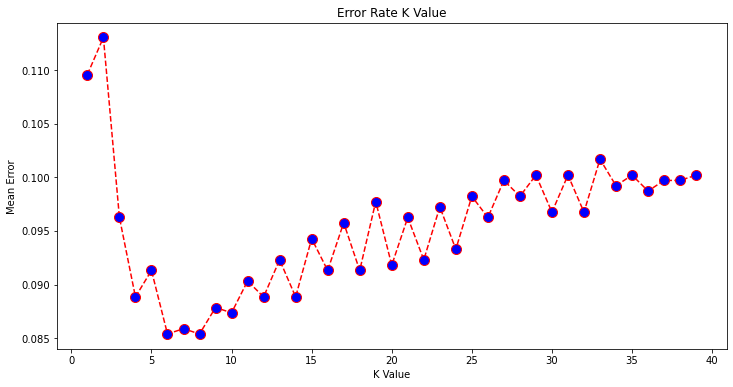

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

* One-hot encoding
    * Think we may only need this if doing deep learning - other models may only require labelencoding

# Machine Learning Model - Random Forest Model

## Prediction

## Create comparison data frame